# CUSTOMER SEGMENTATION PROJECT

### PROJECT GOAL:
The goal of this project is cluster the customers into different groups
based on their spending behavioural pattern. This will help understand
the taste of each customers and will help the company to target each customer with the right advert, product and service.

In [31]:
# data wrangling libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# data modelling and statistical analysis library
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import k_means,dbscan


In [32]:
data = pd.read_csv('cleaned_marketing.csv')

In [33]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# check the columns
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [34]:
# drop the unnecesary columns

data.drop(columns= ['ID','Dt_Customer'], inplace=True)

In [35]:
# check the datatypes of each column and null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year_Birth           2240 non-null   int64 
 1   Education            2240 non-null   object
 2   Marital_Status       2240 non-null   object
 3   Income               2240 non-null   object
 4   Kidhome              2240 non-null   int64 
 5   Teenhome             2240 non-null   int64 
 6   Recency              2240 non-null   int64 
 7   MntWines             2240 non-null   int64 
 8   MntFruits            2240 non-null   int64 
 9   MntMeatProducts      2240 non-null   int64 
 10  MntFishProducts      2240 non-null   int64 
 11  MntSweetProducts     2240 non-null   int64 
 12  MntGoldProds         2240 non-null   int64 
 13  NumDealsPurchases    2240 non-null   int64 
 14  NumWebPurchases      2240 non-null   int64 
 15  NumCatalogPurchases  2240 non-null   int64 
 16  NumSto

In [36]:
# doublecheck the null values 

data.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [37]:
# generate age column, drop year_birth, handle data type issues

data['age'] = [2024 - x for x in data['Year_Birth']] # create age
data.drop(columns=['Year_Birth'], inplace=True) # drop year of birth


In [38]:
# converting columns to integer
data = data[data['Income'] != ' ']
data.reset_index(drop = True, inplace = True)

data = data.astype({
    'Income': 'int'
})

In [39]:
# inspecting the categorical columns

data['Education'].unique()
data['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [40]:
## Updating Marital Status Labels for Consistency: Single Status Standardization
data['Marital_Status'] = ['single' if x in ['YOLO','Absurd','Alone','Single'] else x for x in data['Marital_Status']]

In [41]:
## Encoding Categorical Variables: Marital Status and Education to Numeric Representation
cat_cols = ['Marital_Status','Education']
encoder = LabelEncoder()
for cols in cat_cols:
    data[f'{cols}_nums'] = encoder.fit_transform(data[cols])

In [42]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,Marital_Status_nums,Education_nums
0,Graduation,single,58138,0,0,58,635,88,546,172,...,0,0,0,0,3,11,1,67,4,2
1,Graduation,single,46344,1,1,38,11,1,6,2,...,0,0,0,0,3,11,0,70,4,2
2,Graduation,Together,71613,0,0,26,426,49,127,111,...,0,0,0,0,3,11,0,59,2,2
3,Graduation,Together,26646,1,0,26,11,4,20,10,...,0,0,0,0,3,11,0,40,2,2
4,PhD,Married,58293,1,0,94,173,43,118,46,...,0,0,0,0,3,11,0,43,1,4


In [43]:
final_data = data.drop(columns = cat_cols)

In [44]:
# modelling the data
## Standardizing Data and Performing PCA for Dimensionality Reduction
scaler = StandardScaler()
scaled_df = scaler.fit_transform(final_data)
final_data = pd.DataFrame(data=scaled_df, columns=final_data.columns)
pca = PCA(n_components= 3)
columns = ['col1','col2','col3']
scaled_df = pca.fit_transform(final_data)
scaled_df = pd.DataFrame(data=scaled_df, columns=columns)

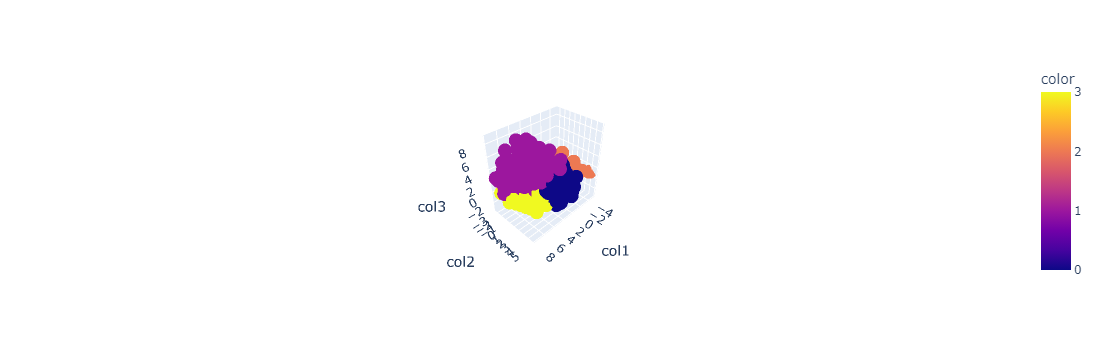

In [45]:
## Visualizing PCA-Transformed Data in 3D with Predicted Labels
px.scatter_3d(data_frame=scaled_df, x = 'col1', y = 'col2', z = 'col3',
              color= predictions)

In [46]:
# clustering 
## Applying K-means Clustering with 4 Clusters to Scaled Data
kmeans = k_means(X = scaled_df, n_clusters=4,n_init= 'auto')

In [47]:
predictions = kmeans[1]

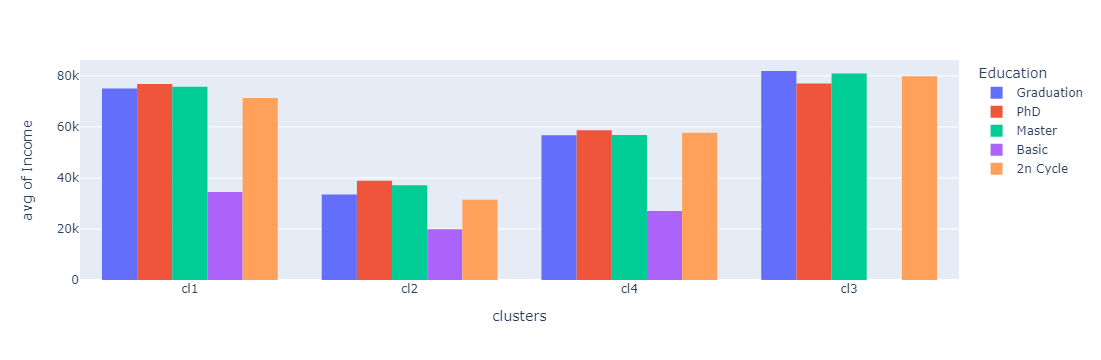

In [48]:
## Analyzing Income Distribution Across Clusters by Education Level
data['clusters'] = ['cl1' if x == 1 else 'cl2' if x == 2 else
                    'cl3' if x == 3 else 'cl4' for x in predictions]
px.histogram(data_frame=data, x = 'clusters', y = 'Income',
             histfunc='avg', color = 'Education', barmode='group')


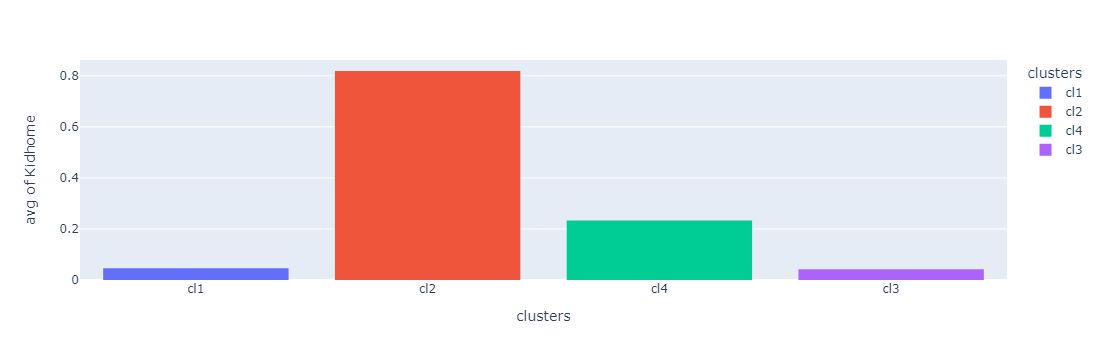

In [49]:
## "Average Number of Kidhome Across Clusters"
px.histogram(data_frame=data, x = 'clusters', y = 'Kidhome',
             histfunc='avg', color = 'clusters')

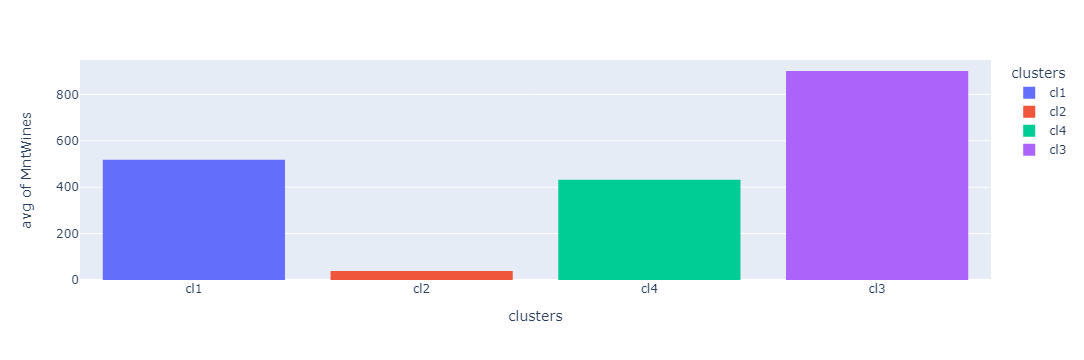

In [50]:
## Average Wine Expenditure Across Clusters
px.histogram(data_frame=data, x = 'clusters', y = 'MntWines',
             histfunc='avg', color = 'clusters')

In [52]:
data.head(3)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,Marital_Status_nums,Education_nums,clusters
0,Graduation,single,58138,0,0,58,635,88,546,172,...,0,0,0,3,11,1,67,4,2,cl1
1,Graduation,single,46344,1,1,38,11,1,6,2,...,0,0,0,3,11,0,70,4,2,cl2
2,Graduation,Together,71613,0,0,26,426,49,127,111,...,0,0,0,3,11,0,59,2,2,cl1


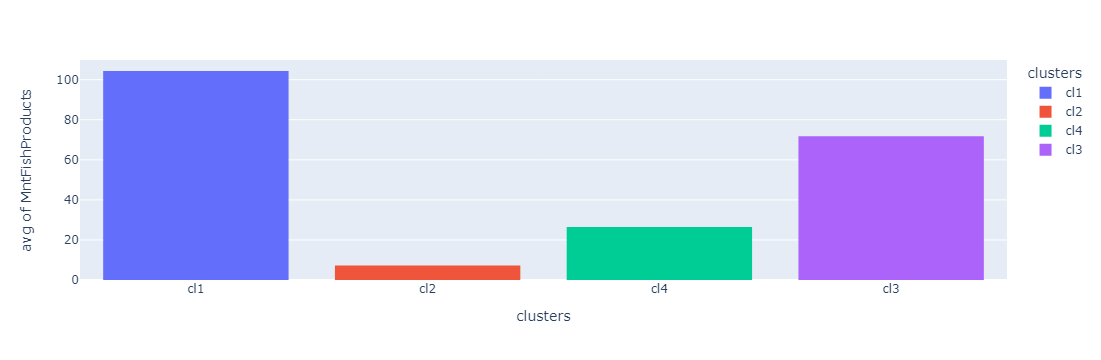

In [53]:
#cluster groups and fish products
px.histogram(data_frame=data, x = 'clusters', y = 'MntFishProducts',
             histfunc='avg', color = 'clusters')

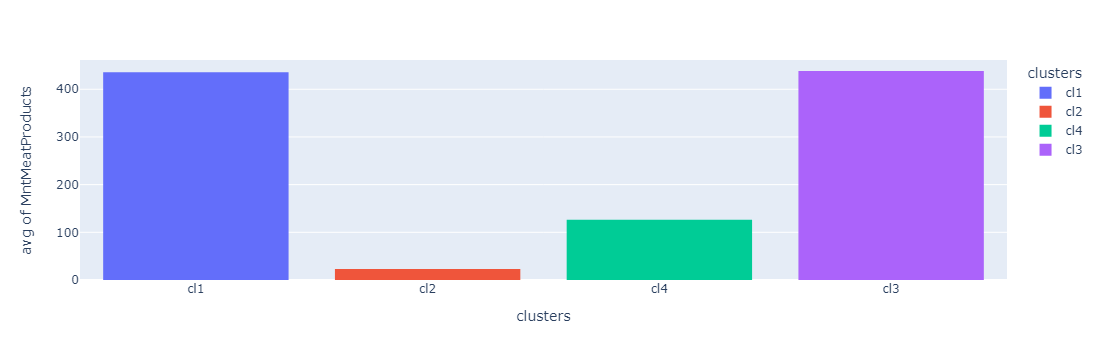

In [54]:
#cluster groups and meat products
px.histogram(data_frame=data, x = 'clusters', y = 'MntMeatProducts',
             histfunc='avg', color = 'clusters')

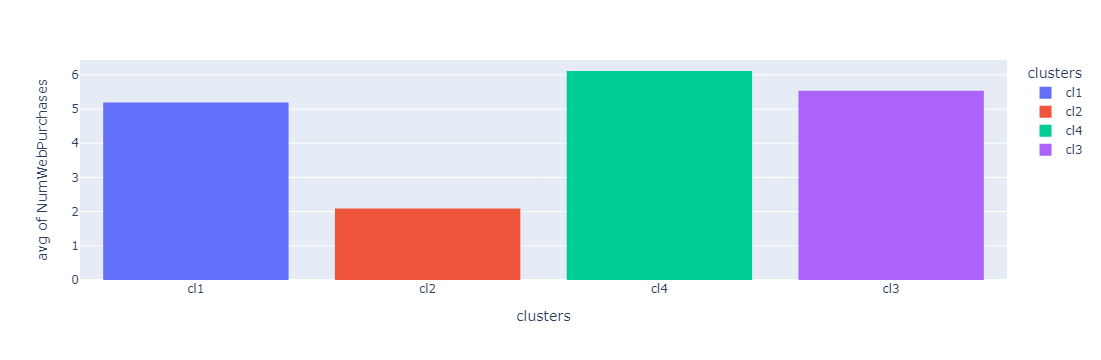

In [55]:
#cluster groups and web purchases
px.histogram(data_frame=data, x = 'clusters', y = 'NumWebPurchases',
             histfunc='avg', color = 'clusters')

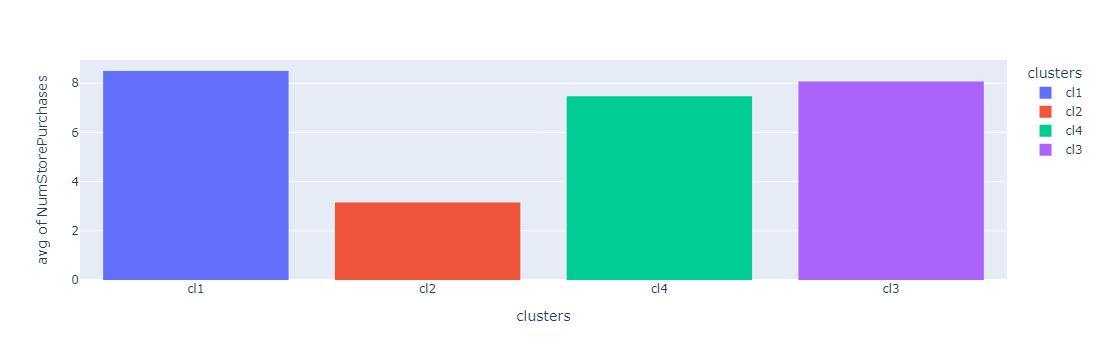

In [58]:
#cluster groups and NumStorePurchases(people who prefer to go to the store)
px.histogram(data_frame=data, x = 'clusters', y = 'NumStorePurchases',
             histfunc='avg', color = 'clusters')

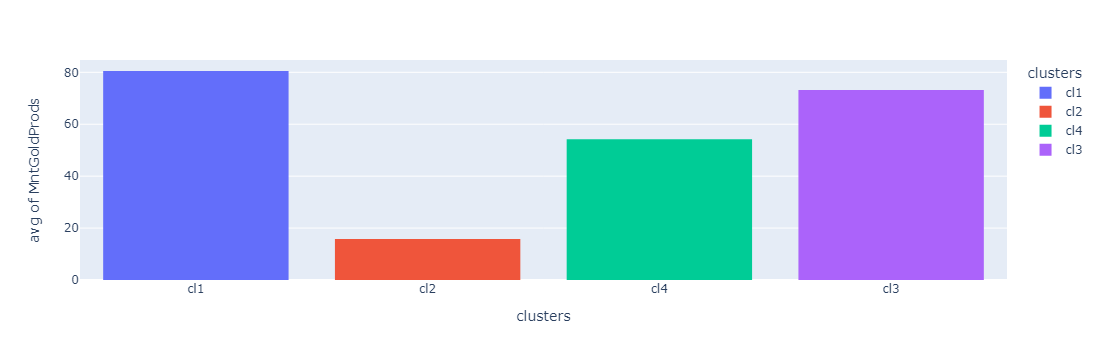

In [59]:
#cluster groups and MntGoldProds(people who like jewelry)
px.histogram(data_frame=data, x = 'clusters', y = 'MntGoldProds',
             histfunc='avg', color = 'clusters')


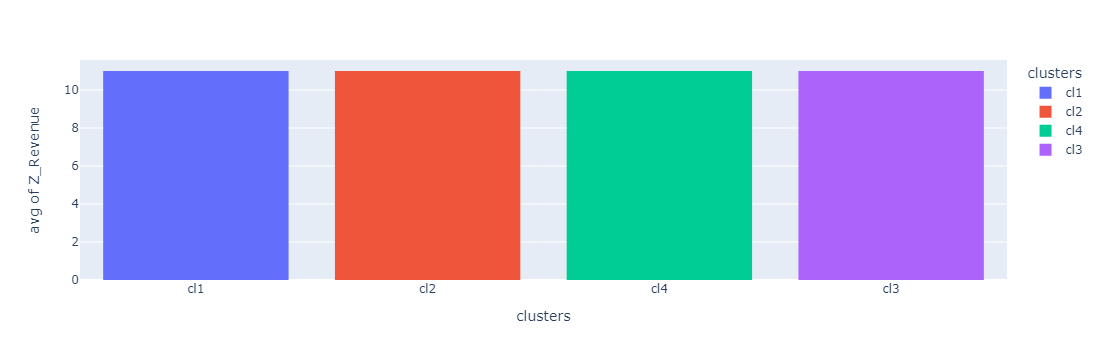

In [61]:
#cluster groups and revenue
px.histogram(data_frame=data, x = 'clusters', y = 'Z_Revenue',
             histfunc='avg', color = 'clusters')